In [1]:
%load_ext autoreload
%autoreload 2

# Example Notebook - Muscular Acitivity for Emotions

This simple notebook shall serve as a reference on how to use this library.
The default settings of all functions are set to the values used in the paper and the shown plots in this repository.

Please feel free to copy this notebook and play around with the settings and the data.

In [52]:
import pandas as pd
import electromyogram as emg
import matplotlib.pyplot as plt
import palettable

from matplotlib import rc

## Example Data

First we load the sEMG data from the provided csv files.
Please note that the test data is not accurate and only serves as an example.


In [3]:
fridlund = pd.read_csv('data/fridlund.csv', index_col=0).transpose()
kuramoto = pd.read_csv('data/kuramoto.csv', index_col=0).transpose()

## Visualize a single emotion

In this single example we show how to visualize the muscular activity for a single emotion.
The data is already prepared in the csv files and no other processing is needed. The preprocessing of your data might be different, hence we avoid to provide a general function for this.

The pipeline for the visualization is as follows:
1. Load the data
2. Interpolate the spatial locations of the electrodes
3. Colorize the values according based on physiological knowledge
4. Postprocess the plots, which removes the outer area of the canonical face and adds a the triangle shape for better orientation

In [64]:
powermap_angry = emg.interpolate(scheme=emg.Fridlund(), emg_values=fridlund['angry'], shape=(1024, 1024))

powermap_angry_gray  = emg.colorize(powermap_angry, cmap="gray")
powermap_angry_color = emg.colorize(powermap_angry, cmap=palettable.scientific.sequential.Imola_20)

powermap_angry_gray  = emg.postprocess(powermap_angry_gray, triangles_alpha=0.3)
powermap_angry_color = emg.postprocess(powermap_angry_color, triangles_alpha=0.3)

Text(0.5, 1.0, 'Fridlund - Angry - Interpolated - Colorized')

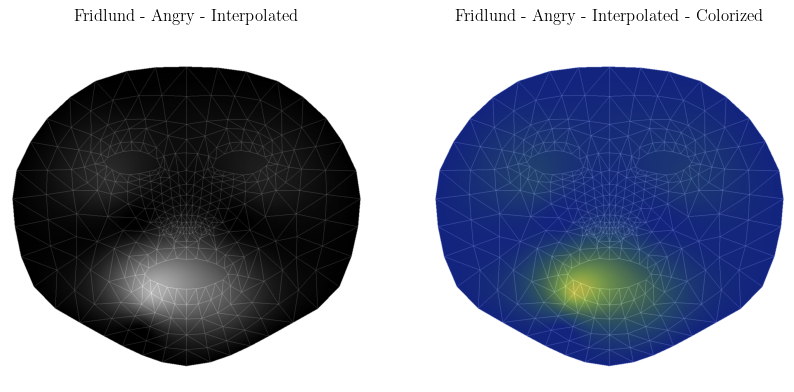

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(powermap_angry_gray)
ax[1].imshow(powermap_angry_color)
ax[0].set_title('Fridlund - Angry - Interpolated')
ax[1].set_title('Fridlund - Angry - Interpolated - Colorized')

## Visualize all emotions for both

We plot now the data for all emotions, wrapping all the steps in a simple loop.
All emotions, for both schemes, are plotted in a single figure as a nice overview. 

In [66]:
def disable_ax(a):
    a.get_xaxis().set_ticks([])
    a.get_xaxis().set_ticklabels([])
    a.get_yaxis().set_ticks([])
    a.get_yaxis().set_ticklabels([])
    # remove the spline
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_visible(False)
    a.spines["left"].set_visible(False)

In [67]:
# rcParams['text.usetex'] = True
# make it look like LaTeX
rc('font',**{'family':'serif','serif':['Roboto']})
rc('text', usetex=True)

In [85]:
fridlund_powermaps = {}
kuramoto_powermaps = {}

for emotion in fridlund.columns:
    powermap = emg.interpolate(scheme=emg.Fridlund(), emg_values=fridlund[emotion], shape=(1024, 1024))
    powermap = emg.colorize(powermap, cmap=palettable.scientific.sequential.Imola_20)
    powermap = emg.postprocess(powermap, triangles_alpha=0.3)
    fridlund_powermaps[emotion] = powermap

for emotion in kuramoto.columns:
    powermap = emg.interpolate(scheme=emg.Kuramoto(), emg_values=kuramoto[emotion], shape=(1024, 1024))
    powermap = emg.colorize(powermap, cmap=palettable.scientific.sequential.Imola_20)
    powermap = emg.postprocess(powermap, triangles_alpha=0.3)
    kuramoto_powermaps[emotion] = powermap 

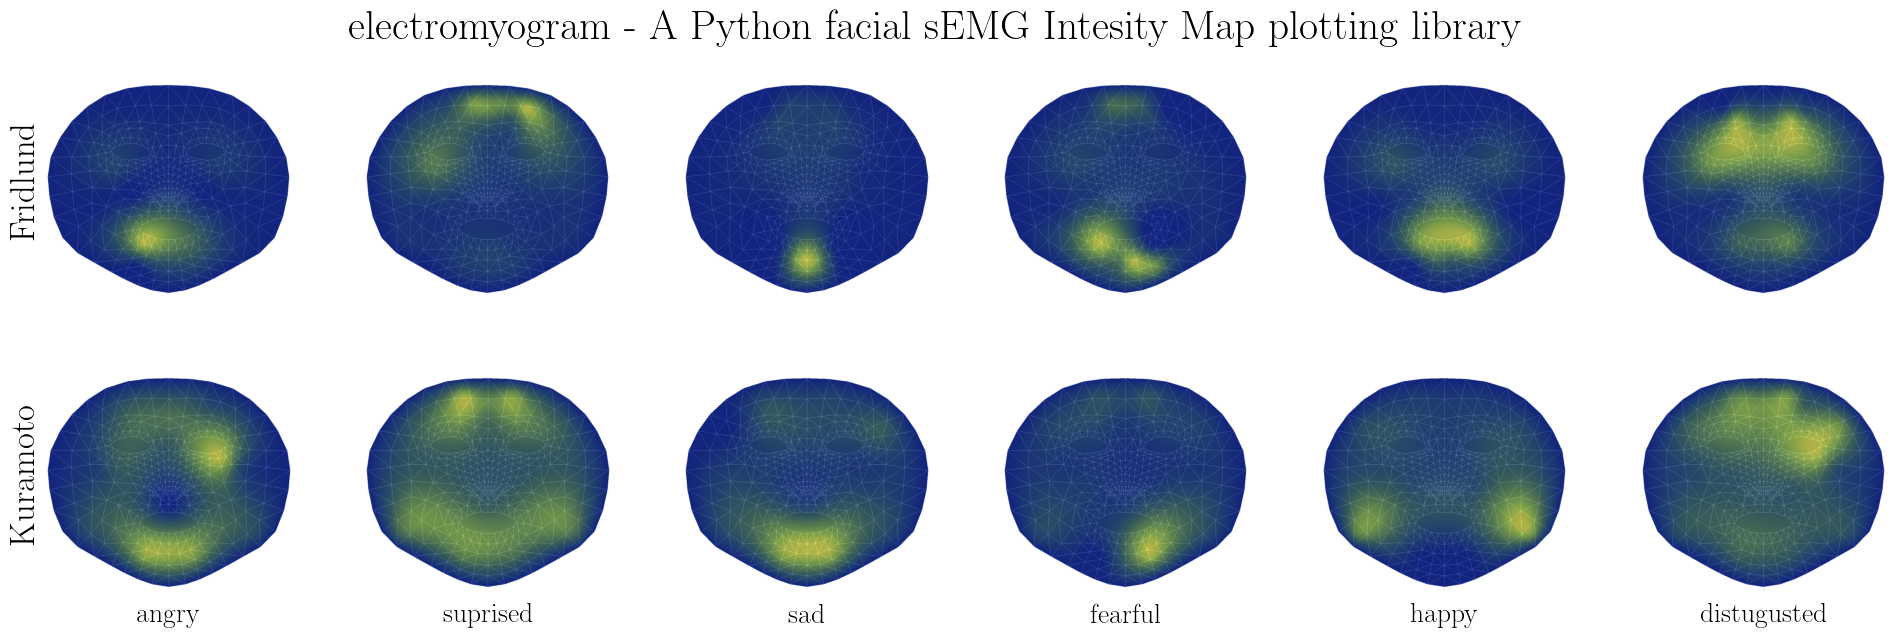

In [90]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(24, 7))

for i, emotion in enumerate(fridlund_powermaps.keys()):
    disable_ax(ax[0,i])
    disable_ax(ax[1,i])
    
    ax[0,i].imshow(fridlund_powermaps[emotion])
    ax[1,i].imshow(kuramoto_powermaps[emotion])
    ax[1,i].set_xlabel(emotion, fontsize=20)
    
ax[0,0].set_ylabel('Fridlund', fontsize=25)
ax[1,0].set_ylabel('Kuramoto', fontsize=25)

fig.suptitle("electromyogram - A Python facial sEMG Intesity Map plotting library", fontsize=30, y=.95)
# plt.savefig("../files/teaser.jpg", dpi=100, bbox_inches='tight')
plt.show()